# Libraries

In [85]:
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm 
import os
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = "Malgun Gothic"


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [86]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(context = 'talk',  
              style = 'darkgrid',  
              font = 'Malgun Gothic', 
              font_scale = 2,         
              rc=custom_params) 

# Read the Data

In [87]:
cur_dir = os.getcwd()
for roots, folders, files in os.walk(cur_dir):
    if '.git' not in roots:
        print(roots, files)

c:\Users\jaekyung\Documents\ML ['.gitignore', 'graph.txt', 'Missing_values.ipynb', 'ml-outlier.ipynb', 'ml_HeartDisease.ipynb', 'pre.txt']
c:\Users\jaekyung\Documents\ML\.vscode ['settings.json']
c:\Users\jaekyung\Documents\ML\data ['heart_disease_uci.csv', 'ObesityDataSet.csv']


In [88]:
data_list = os.listdir(cur_dir + "\data")
Dataset = dict()

for data in data_list:
    Dataset[data[:-4]] = pd.read_csv(cur_dir + f"\data\{data}")

In [89]:
hdu = Dataset['heart_disease_uci']
df = hdu.copy()

In [90]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Data info

In [91]:
print(f"There are {df.shape[0]} pationts and {df.shape[1]} features in the dataset.")

There are 920 pationts and 16 features in the dataset.


In [92]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [94]:
statitical_summary = df.describe()
statitical_summary.T

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


> numeric과 categolical type data 존재 (분류하여 보기)             
> null data가 있어 column별 특성을 알아봐야함

# EDA

## Dtypes

### Categorical Data

In [95]:
df_cat = df.select_dtypes(include = 'object')
df_cat.columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

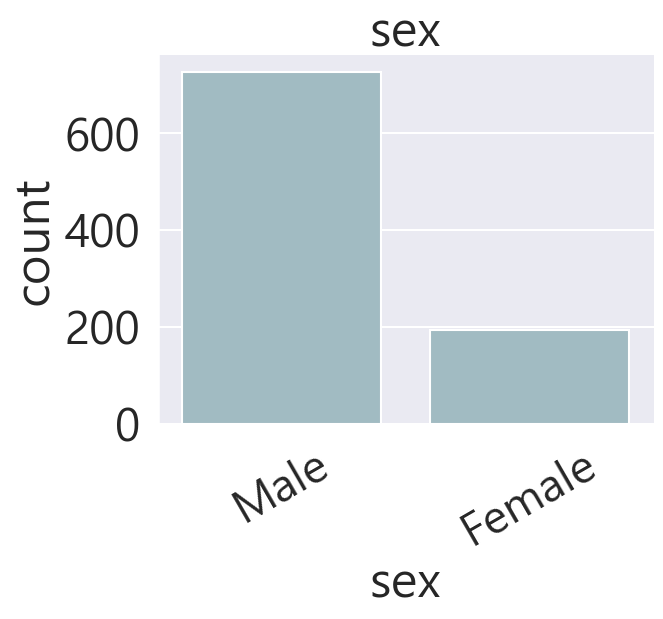

      sex  count
0    Male    726
1  Female    194


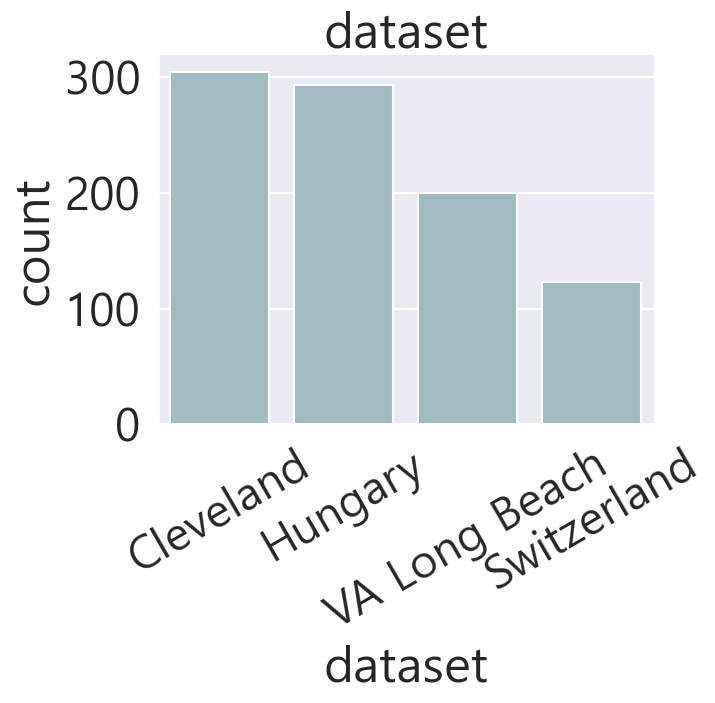

         dataset  count
0      Cleveland    304
1        Hungary    293
2  VA Long Beach    200
3    Switzerland    123


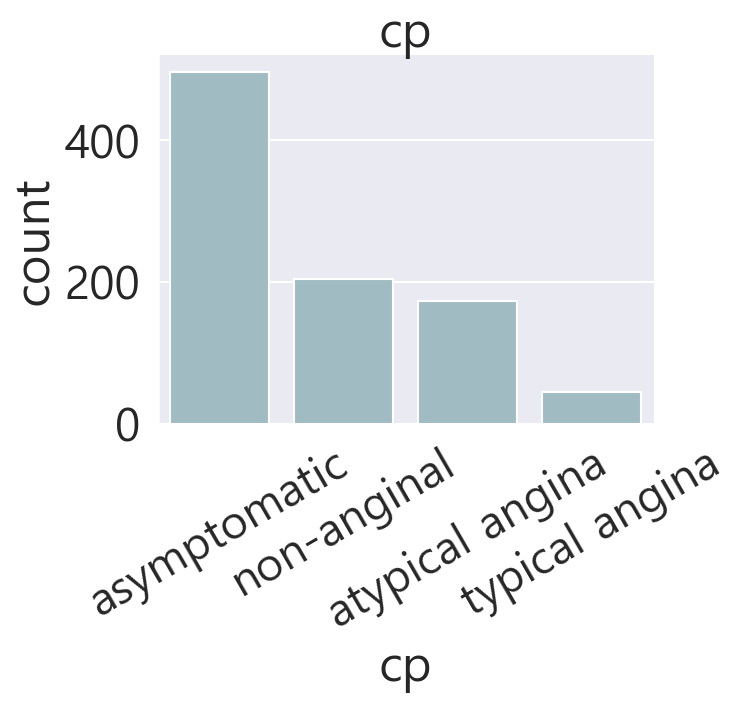

                cp  count
0     asymptomatic    496
1      non-anginal    204
2  atypical angina    174
3   typical angina     46
fbs


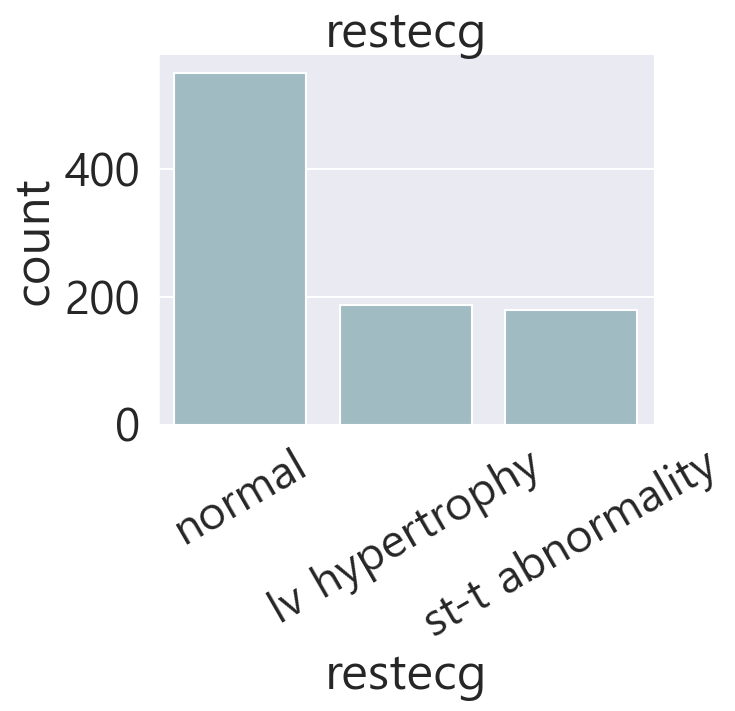

            restecg  count
0            normal    551
1    lv hypertrophy    188
2  st-t abnormality    179
exang


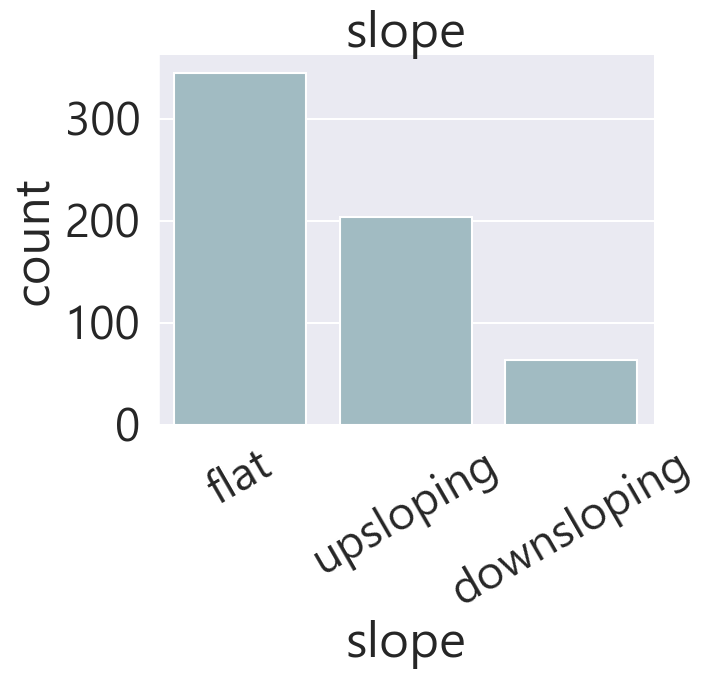

         slope  count
0         flat    345
1    upsloping    203
2  downsloping     63


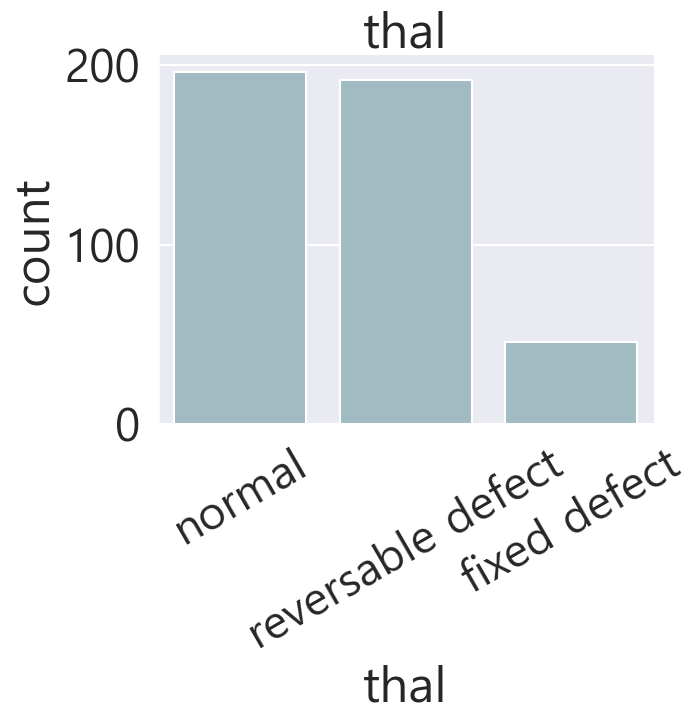

                thal  count
0             normal    196
1  reversable defect    192
2       fixed defect     46


In [96]:
for num, col in enumerate((df_cat.columns)):
    try:    
        num = df_cat[col].value_counts().reset_index()
        sns.barplot(data = df_cat, x = num[col], y = num['count'], color = '#9BBEC8')
        plt.xticks(rotation = 30)
        plt.title(col)
        plt.show()
        print(num)
    except:
        print(col)
        pass

### Numeric data

In [97]:
df_num = df.select_dtypes(include = 'number').drop(columns = ['id'])

In [98]:
for i, col in enumerate((df_num)):
    i = df_num[col].reset_index().sort_values(col)
    i['index'] = 1
    fig = px.histogram(data_frame = i,
                       x = i[col],
                       y = i['index'],
                       marginal = 'box',
                       nbins = i[col].nunique(),
                       color_discrete_sequence = ['#3F72AF'])
    fig.update_layout(title = col, bargap = 0.1)
    fig.show()

## Columns

### Target

In [99]:
num = df['num'].value_counts().reset_index()
num

,num,count
0,0,411
1,1,265
2,2,109
3,3,107
4,4,28


<Axes: xlabel='num', ylabel='count'>

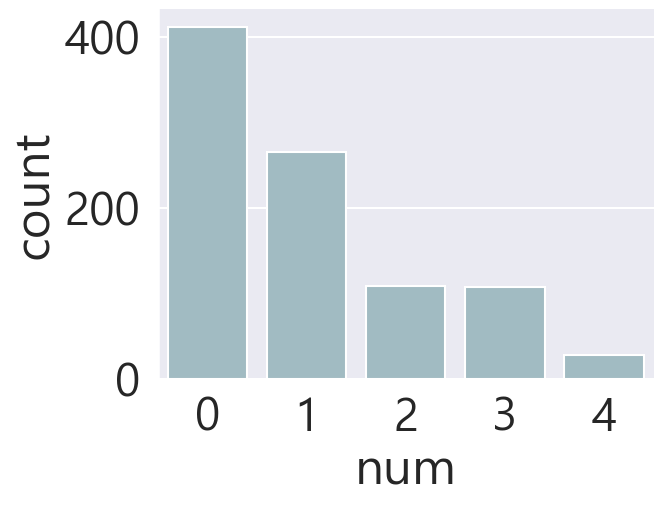

In [100]:
sns.barplot(data = num, x = num['num'], y = num['count'], color = '#9BBEC8')

> num = target

* 0: No presence of heart disease.
* 1: Certain level or type of heart disease.
* 2: Different level or type of heart disease.
* 3: Another level or type of heart disease.
* 4: Yet another level or type of heart disease.

심장병의 존재 유무와 증상레벨, 타입 전부를 나타내는 지표

### AGE

In [101]:
max_age = df.age.max()
min_age = df.age.min()

print(f"Age\n-----\nMax Age: {min_age}\nMin Age: {max_age}")

Age
-----
Max Age: 28
Min Age: 77


In [102]:
fig = px.histogram(df.age, marginal='box', text_auto = True)
fig.show()

In [103]:
colors = ['lightslategrey'] * 100
colors[26] = 'crimson'
colors[27] = 'crimson'
colors[30] = 'crimson'

trace = go.Bar(x = df.age.value_counts().reset_index().sort_values(by = 'age').age,
               y = df.age.value_counts().reset_index().sort_values(by = 'age')['count'], marker_color = colors, marker_line_color='rgb(8,48,107)')

data = [trace]
go.Figure(data = data)

In [104]:
df_cp = df.cp.value_counts().reset_index()
df_cp

,cp,count
0,asymptomatic,496
1,non-anginal,204
2,atypical angina,174
3,typical angina,46


### CP(Chest Pain Type)

In [105]:
df.cp.value_counts().reset_index()

,cp,count
0,asymptomatic,496
1,non-anginal,204
2,atypical angina,174
3,typical angina,46


In [106]:
colors = ['lightslategrey',]*100
colors[0] = 'crimson'

trace = go.Bar(x = df_cp['cp'],
               y = df_cp['count'], 
               marker_color = colors, 
               marker_line_color='rgb(8,48,107)'
               )

data = [trace]
layout = go.Layout(title = 'Chest Pain Type')
go.Figure(data = data, layout = layout)

* Asymptomatic: 심장병이 있음에도 불구하고 가슴통증이나 불편함이 없음

* Non-anginal: 심장병과 관련없는 가슴통증을 호소, 아마 근육이나 위장 같은 다른 요인들로 인한 통증일 것임
* Atypical angina: 협심증과 비슷한 통증이지만 그 주기, 강도, 트리거가 다름 typical angina로 분류 할 수 없는 증상
* typical angina: 가장 흔한 심장병 관련 가슴 통증 증상, 트리거는 육체운동이나 스트레스이고 니트로 글리세린이 증상에 효과적임

### Trestbps(Blood pressure)

In [107]:
max_trestbps = df.trestbps.max()
min_trestbps = df.trestbps.min()

print(f"Trestbps:\nMax: {max_trestbps} \nMin: {min_trestbps}")

Trestbps:
Max: 200.0 
Min: 0.0


In [108]:
x = df.trestbps.value_counts().reset_index().sort_values(by = 'trestbps')['trestbps']
y = df.trestbps.value_counts().reset_index().sort_values(by = 'trestbps')['count']

In [109]:
trace = go.Histogram(x = x, 
                     y = y, 
                     marker_color = 'rgb(158,202,225)', 
                     marker_line_color='rgb(8,48,107)', text = y, textposition = 'auto')

data = [trace]
layout = go.Layout(title = 'Trestbps hitogram')
go.Figure(data = data, layout = layout)

* 평범한 혈압은 통상적으로 120/80 mmhg 정도임.
* 편차가 크게 표준보다 낮거나 높은 혈압은 건강문제를 나타냄
* 고혈압은 심장병을 유발하고, 저혈압 또한 건강상 나쁘지만 심장병과는 거리가 멈


### Chol(Cholesterol)

In [110]:
max_chol = df.chol.max()
min_chol = df.chol.min()

print(f"Chol:\nMax Chol: {max_chol}\nMin Chol: {min_chol}")

Chol:
Max Chol: 603.0
Min Chol: 0.0


In [111]:
x = df.chol.value_counts().reset_index().sort_values(by = 'chol')['chol']
y = df.chol.value_counts().reset_index().sort_values(by = 'chol')['count']

In [112]:
trace1 = go.Scatter(x = x, y = y, marker_color = 'crimson')
trace2 = go.Bar(x = x, y = y, marker_color = 'blue')

data = [trace1, trace2]
layout = go.Layout(title = "Chol")
fig = go.Figure(data = data, layout = layout)
fig.update_yaxes(range = [0, 180])
fig.show()

* 중간레벨: 통상적으로 200mg/dl, 200~239는 어느정도 높음, 240이상은 많이 높음
* 높은 콜레스테롤 수치: 콜레스테롤 수치의 증가는 심장병을 야기함
* 낮은 콜레스테롤 수치: 낮은수치 또한 건강에 이상이 있음을 보여주지만 심장병은 아님

### FBS(Fasting blood sugar)

In [113]:
df['fbs'].value_counts().reset_index()

,fbs,count
0,False,692
1,True,138


<Axes: xlabel='fbs', ylabel='count'>

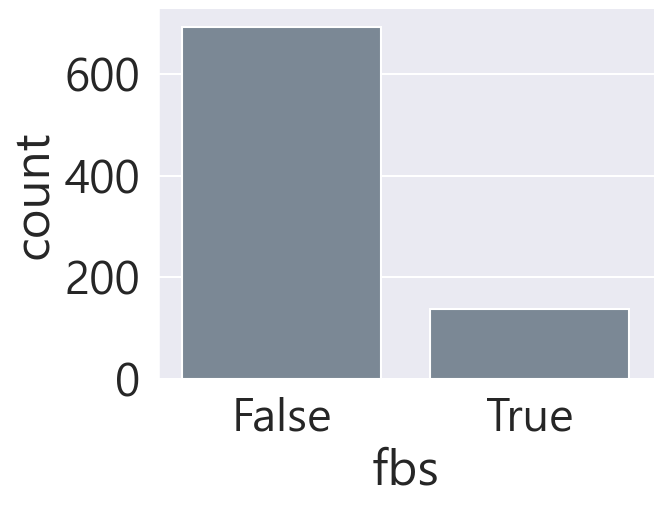

In [114]:
colors = 'lightslategrey'

sns.countplot(data = df, x = df.fbs, color = colors)

* FBS는 120mg/dl 이상일 경우 심장병에 치명적 요인인 비만일 확률이 높음, 수치가 올라가면 혈관에 무리를 줌
* 0: 120mg/dl 미만
* 1: 120mg/dl 이상

### Restecg(resting electrocardiographic results)

In [115]:
df_restecg = df['restecg'].value_counts().reset_index()
df_restecg

,restecg,count
0,normal,551
1,lv hypertrophy,188
2,st-t abnormality,179


In [116]:
colors = ['lightslategrey'] * 20
colors[0] = 'crimson'

trace = go.Bar(x = df_restecg['restecg'], y = df_restecg['count'], marker_color = colors)

data = [trace]
layout = go.Layout(title = 'Resting electrocardiographic')
go.Figure(data = data, layout = layout)

* Normal: EGC에 중대한 문제가 없음
* ST-T Abnormality: 심전도에 잠재적 위험이 있을 수 있음
* Left ventricular Hypertrophy: 좌심실 경화

### Thalch(maximum heart rate achieved)

In [117]:
thalch_min = df.thalch.min()
thalch_max = df.thalch.max()

print(f"Thalch\n-----\nThalch Max: {thalch_max}\nThalch Min: {thalch_min}")

Thalch
-----
Thalch Max: 202.0
Thalch Min: 60.0


In [118]:
df_thalch = df['thalch'].reset_index()
df_thalch['index'] = 1

In [119]:
fig = px.histogram(df.thalch, 
                   nbins = df.thalch.nunique(), 
                   marginal = 'box',
                   color_discrete_sequence = ['#3F72AF'])

fig.update_layout(title = col, bargap = 0.1)
fig.show()

* 운동중이 아닐때의 심박수가 높다면 심장병의 위험이나 비정상적인 심장 반응을 야기할 수 있다

### Exang(exercise-induced angina)

In [120]:
def exang_convert(values):
    if values == True:
        return 'T'
    elif values == False:
        return 'F'
    return values

df_exang = df.exang.value_counts().reset_index() 
df_exang['exang']= df.exang.value_counts().reset_index()['exang'].apply(exang_convert)

<Axes: xlabel='exang', ylabel='count'>

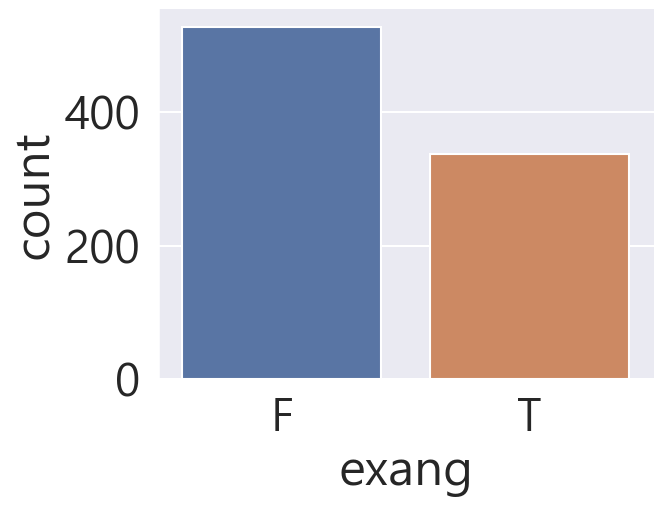

In [121]:
sns.barplot(data = df_exang, 
            x = df_exang['exang'],
            y = df_exang['count'])

* exang: 환자들이 운동으로 인한 협심증 증상을 겪었는지               
* 1: Positive                   
* 0: Negative

### Oldpeak(ST depression induced by exercise relative to rest)

In [122]:
df.oldpeak.describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [123]:
fig = px.histogram(df.oldpeak, 
                   marginal = 'box',
                   color_discrete_sequence = ['#3F72AF'],
                   nbins = df.oldpeak.nunique()
                   )

fig.update_layout(bargap = 0.1)

* 심전도 검사시 ST분절?이 낮은 상태?                     
* max값인 6.2는 아주 높은상태로 심혈관 질환의 중요한 표시라고 함                  
* min값인 -2.6은 평범하지 않은 값, 아마도 데이터의 오류나 측정 오류로 예상됨

### Slope

In [124]:
df.slope.describe()

count      611
unique       3
top       flat
freq       345
Name: slope, dtype: object

In [125]:
df_slope = df.slope.value_counts().reset_index()
df_slope

,slope,count
0,flat,345
1,upsloping,203
2,downsloping,63


In [126]:
fig = px.bar(data_frame = df_slope, 
             x = 'slope', 
             y = 'count',
             color_discrete_sequence = ['#3F72AF'])

fig.update_layout(title = 'Slope')

* 심전도 스트레스 검사에서 중요한 정보            
* flat: 잠재적인 심장문제를 추측할 수 있는정도, 더욱더 정밀한 조사가 필요함          
* upsloping: 일반적으로 정상으로 간주, 심각한 심장질환을 의미하지는 않음       
* downsloping: 대체적으로 심각한 관상동맥 질환에 관련있음

### Ca(number of major vessels)

<Axes: xlabel='ca', ylabel='count'>

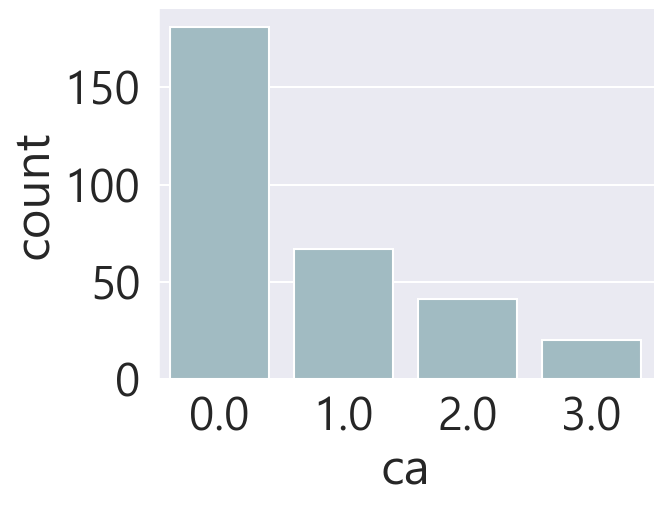

In [127]:
sns.countplot(df.ca, x = df.ca, color = '#9BBEC8')

### Thal(Thalassemia)

In [128]:
df_thal = df.thal.value_counts().reset_index()
df_thal

,thal,count
0,normal,196
1,reversable defect,192
2,fixed defect,46


In [129]:
fig = px.bar(data_frame = df_thal, x = 'thal', y = 'count',
             color_discrete_sequence = ['#9BBEC8'])
fig.show()

* 휴식할떄와 운동후의 혈류를 측정한 데이터         
* normal: normal blood flow          
* reversable drfect thal: 관상동맥이 막혀있는 것과 관련있음. 관리하지 않으면 심각한 심장문제로발전       
* fixed defect: 이전 심장질환이나 관상동맥이 오랜기간 막힘으로 인해 흉터조직이 있음을 시사, 심장 근육의 데미지를 나타냄

## Missing values

In [130]:
df.drop(columns= ['id'], inplace = True)

In [131]:
null_count = df.isnull().sum().reset_index()
nunique_df = df.nunique().reset_index()
dtypes_df = df.dtypes.reset_index()

df_info = pd.merge(null_count, nunique_df, on = 'index', how = "left")
df_info = pd.merge(df_info, dtypes_df, on = "index", how = "left")
df_info = df_info.rename(columns = {'index':'col','0_x':'null_count','0_y':'nunique',0:'dtypes'})
df_info['null_ratio'] = round(df_info['null_count'] / len(df), 2) * 100
df_info['null_ratio'] = df_info['null_ratio'].apply(lambda x: str(int(x)) + '%')
df_info = df_info[['col', 'null_count', 'null_ratio', 'nunique', 'dtypes']]
df_info

,col,null_count,null_ratio,nunique,dtypes
0,age,0,0%,50,int64
1,sex,0,0%,2,object
2,dataset,0,0%,4,object
3,cp,0,0%,4,object
4,trestbps,59,6%,61,float64
5,chol,30,3%,217,float64
6,fbs,90,10%,2,object
7,restecg,2,0%,3,object
8,thalch,55,6%,119,float64
9,exang,55,6%,2,object


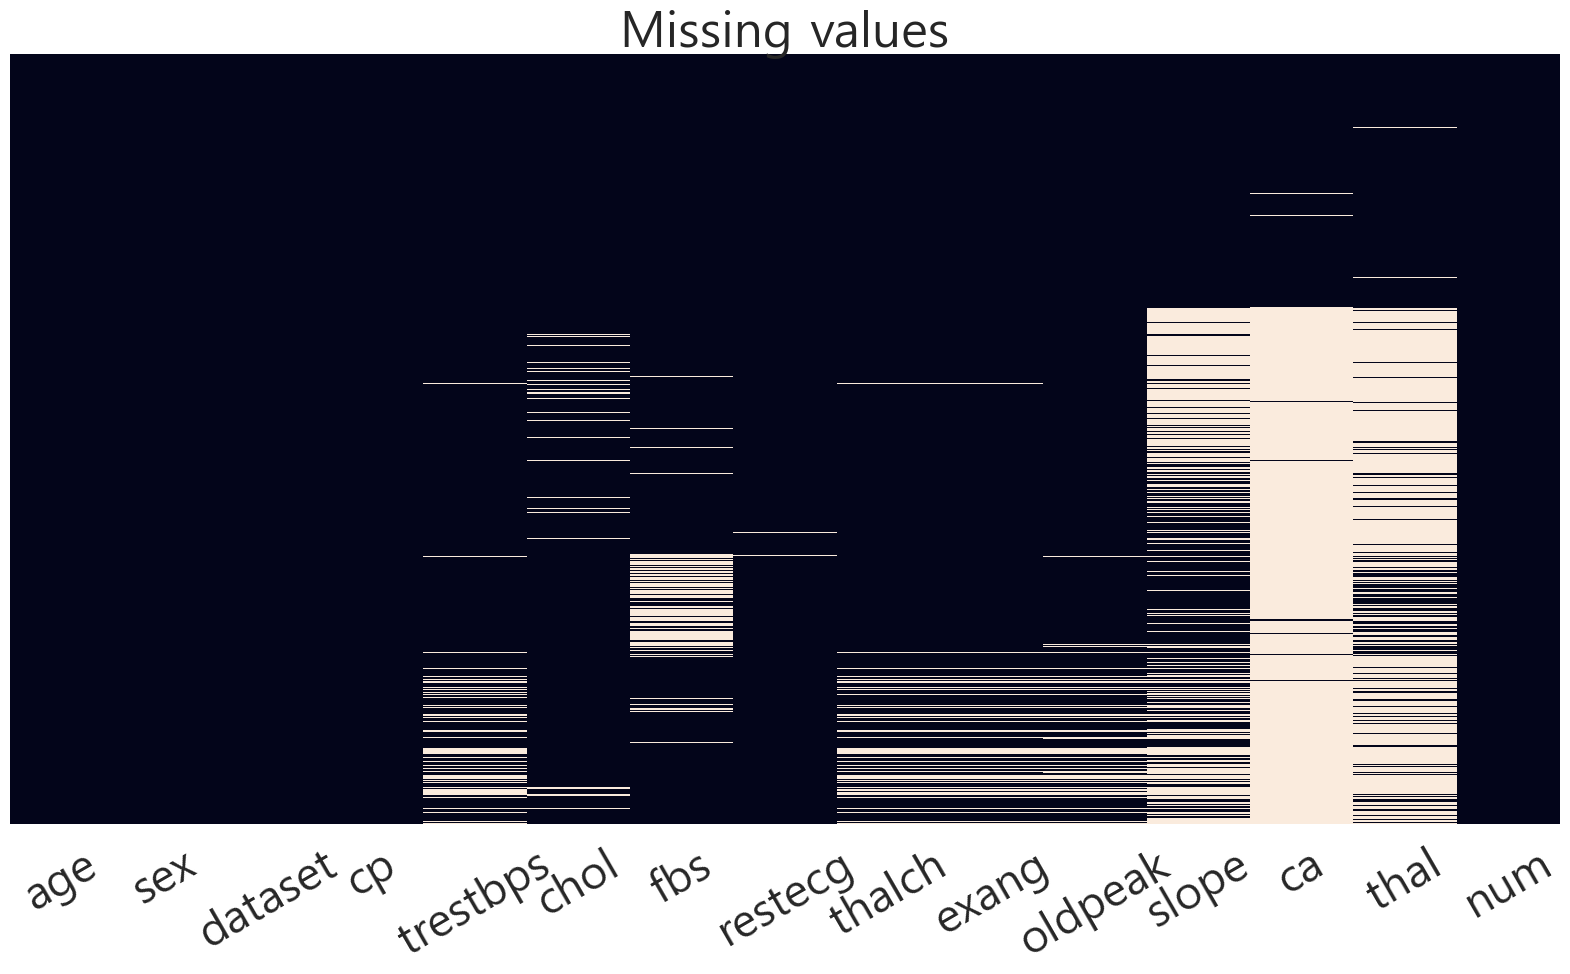

In [132]:
plt.figure(figsize = (20,10))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
plt.title("Missing values")
plt.xticks(rotation = 30)
plt.show()

In [133]:
null_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
null_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [134]:
df_info.loc[df_info['col'] == 'fbs', 'dtypes'] = 'bool'
df_info.loc[df_info['col'] == 'exang', 'dtypes'] = 'bool'
df_info

,col,null_count,null_ratio,nunique,dtypes
0,age,0,0%,50,int64
1,sex,0,0%,2,object
2,dataset,0,0%,4,object
3,cp,0,0%,4,object
4,trestbps,59,6%,61,float64
5,chol,30,3%,217,float64
6,fbs,90,10%,2,bool
7,restecg,2,0%,3,object
8,thalch,55,6%,119,float64
9,exang,55,6%,2,bool


In [135]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [136]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg', 'fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [137]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [138]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [139]:
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.289421965317917 

RMSE = 17.052336557812975 

R2 = 0.09208416975362332 

Missing Values chol : 3.26%
MAE = 53.666573033707856 

RMSE = 76.52618893357116 

R2 = 0.5360845708050731 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.3 accuracy

Missing Values thalch : 5.98%
MAE = 17.068959537572255 

RMSE = 22.117456174480324 

R2 = 0.2886887715310401 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5674127906976744 

RMSE = 0.7873820952710877 

R2 = 0.4093516221310439 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 65.04 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 62.9 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 70.11 accuracy



In [140]:
round(((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False),2)

age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

## Outliers

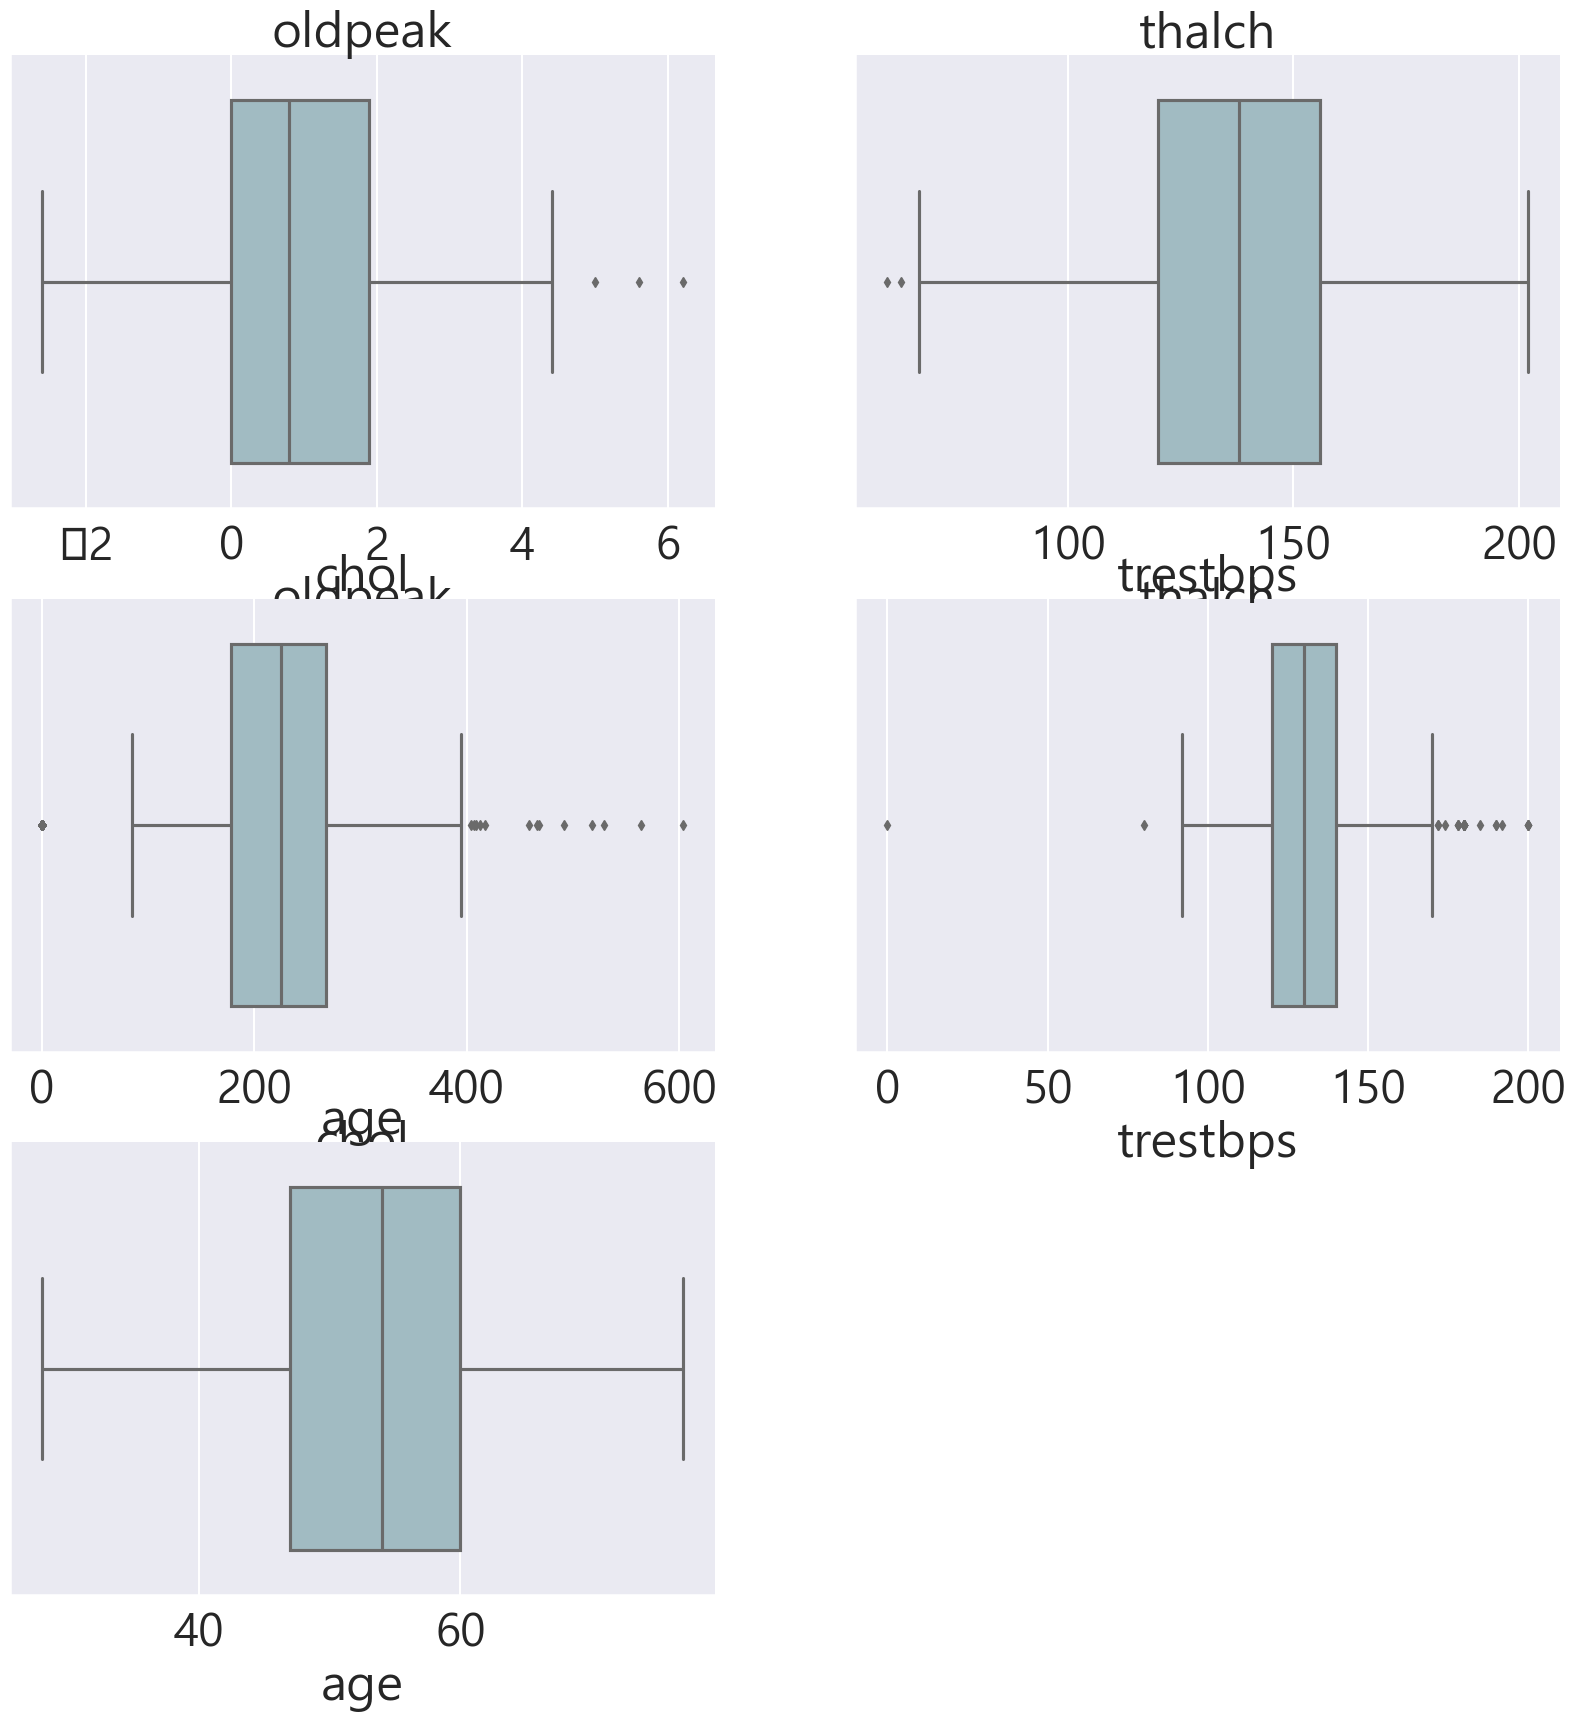

In [141]:
plt.figure(figsize=(20, 20))

colors = '#9BBEC8'

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors)
    plt.title(col)
plt.show()

In [142]:
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

# model

## DT

In [143]:
X = df.drop('num', axis=1)
y = df['num']

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=777)

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.572463768115942
Precision score:  0.572463768115942
Recall score:  0.572463768115942
F1 score:  0.572463768115942


## RF

In [144]:
rf = RandomForestClassifier(n_estimators=100, random_state=777)
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.6086956521739131
Precision score:  0.6086956521739131
Recall score:  0.6086956521739131
F1 score:  0.6086956521739131


## XGBoost

In [145]:
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.6123188405797102
Precision score:  0.6123188405797102
Recall score:  0.6123188405797102
F1 score:  0.6123188405797102
